# Problem set 2: Schwarzschild geodesics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
def V_eff (r,L,k):
    return 1/2*(1-2/r)*(k+(L**2/r**2))
def D_V_eff(r,L,k):
    return (-(L**2)/r**3)+(1/r**2)+((3*(L**2))/r**4)

In [3]:
%matplotlib notebook # get interactive figure
%inline # get a normal inlay figure

UsageError: unrecognized arguments: # get interactive figure


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


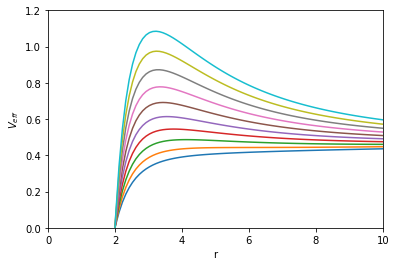

In [4]:
# Generate 100 numbers between 0 an 10 for x-axis of the plot 
r_space = np.linspace(start=0, stop=10, num=100)

# Make a list of a few values of `a` to plot
L_list = np.linspace(start=3, stop=7, num=10)

for L in L_list:
    plt.plot(r_space, V_eff(r_space, L, k=1))
    
    
# Limit the axex to these ranges
plt.ylim(0,1.2)
plt.xlim(0, 10)
# Add axis labels 
plt.xlabel('r')
plt.ylabel('$V_{eff}$');




In [5]:
def r_orbit(L,sign):
    
     return L**2/2 + sign * np.sqrt((L**4/4)-(3*L**2))
        

In [6]:
def t_dot (r,E):
    
    return E/(1-(2/r))

def phi_dot (r,L):
    
    return L/r**2

def r_dot (r,E,L,k,sign):
    

    return sign * np.sqrt (E**2-2*V_eff(r,L,k))
    
def v_dot(r,L, k):
    
    return - D_V_eff(r, L, k)
    
    



In [7]:
def integrate_geodesic(r0, E, L, k, sign, step):
    # Set up lists to store the values of the integration variable `tau`
    # and the integrated values `x(tau)=[r(tau), s(tau)]`.
    # Initially, they contain only the initial values `tau_0` and `[r_0, s_0]`.
    tau_history = [ 0. ]
    x_history = [ [0, r0, 0, r_dot(r0,E,L,k,sign)] ]
    # Set up the integration. The `lambda` function returns `x_dot` as a list `[r_dot, s_dot, ...]`.
    x = ode(lambda tau, x: [
        t_dot (x[1],E),
        x[3],
        phi_dot (x[1], L),
        v_dot(x[1], L, k),
    
    ]).set_integrator('zvode', method='bdf').set_initial_value(x_history[0], tau_history[0])
    # Integrate while these conditions are met. We stop when `r` exceeds `3 * r0`
    # or when `s` exceeds `10`.
    while x.successful() and x_history[-1][1] < 3 * r0 and x_history[-1][1] > 0 and x_history[-1][2]<10*np.pi :
        x_history.append(x.integrate(x.t + step))
        tau_history.append(x.t)
    # Return the history as Numpy arrays, instead of simple lists, so that we can do slicing
    return np.asarray(tau_history), np.asarray(x_history)

In [8]:

L=4.6
r0=r_orbit(L,1)
E=np.sqrt(2*V_eff(r=r0,L=L,k=1)+0.01)


In [9]:
# Perform the integration

t0 = 0
phi0 = 0
v0 = 4

tau, x = integrate_geodesic(r0=r0, E = E, L = L, k = 1, sign = 1, step = 0.5)

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


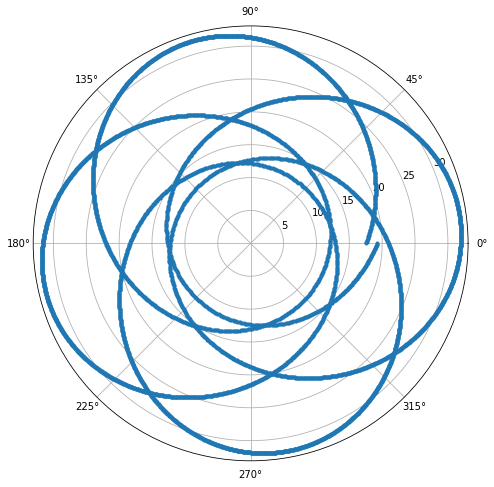

In [10]:
# Plot the results. You can retrieve the history of a particular
# variable by "slicing" the array `x`. For example, `x[:,0]`
# selects all rows of the array, but only the first value of each
# row. This corresponds to all values of the variable `r`.
# We make a polar plot here by treating `s` as an angle (in radians) and
# `r` as the radius corresponding to that angle.
plt.figure(figsize=(8, 8))
plt.polar(x[:,2], x[:,1], marker='.', ls='dotted');